<a href="https://colab.research.google.com/github/ritwiks9635/Natural_Language_Processing_Model/blob/main/Text_Similarity_Find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌜Document Similarity🌛**

In [ ]:
! kaggle competitions download -c quora-question-pairs

100% 309M/309M [00:17<00:00, 21.5MB/s]
100% 309M/309M [00:17<00:00, 18.7MB/s]


## **Import Necessary Packages**

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

In [ ]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


### **Data fields**
- **id** - the id of a training set question pair
- **qid1, qid2** - unique ids of each question (only available in train.csv)
- **question1, question2** - the full text of each question
- **is_duplicate** - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

In [ ]:
train_data.shape

(404290, 6)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## **EDA & Data Preprocessing**

In [ ]:
train_data["is_duplicate"].value_counts()

,count
is_duplicate,
0,255027
1,149263


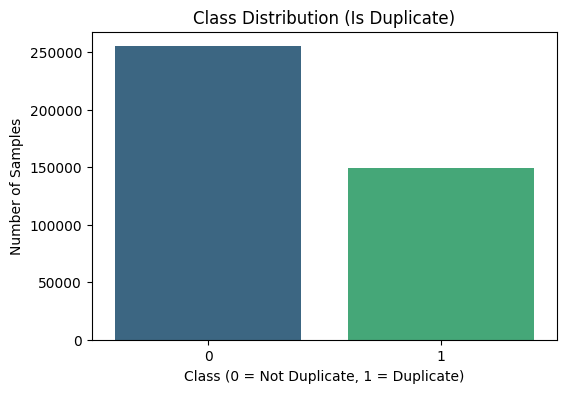

In [ ]:
class_counts = train_data['is_duplicate'].value_counts()


plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution (Is Duplicate)")
plt.xlabel("Class (0 = Not Duplicate, 1 = Duplicate)")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
df_0 = train_data[train_data["is_duplicate"] == 0]
df_1 = train_data[train_data["is_duplicate"] == 1]

df_0 = df_0.head(140000)
df_1 = df_1.head(140000)

train_data = pd.concat([df_0, df_1])

train_data["is_duplicate"].value_counts()

,count
is_duplicate,
0,140000
1,140000


In [ ]:
train_data.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,2
is_duplicate,0


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
print(f"Total len of words q1 {train_data['question1'].str.len().max()}")
print(f"Total len of words q2 {train_data['question2'].str.len().max()}")

Total len of words q1 623
Total len of words q2 1169


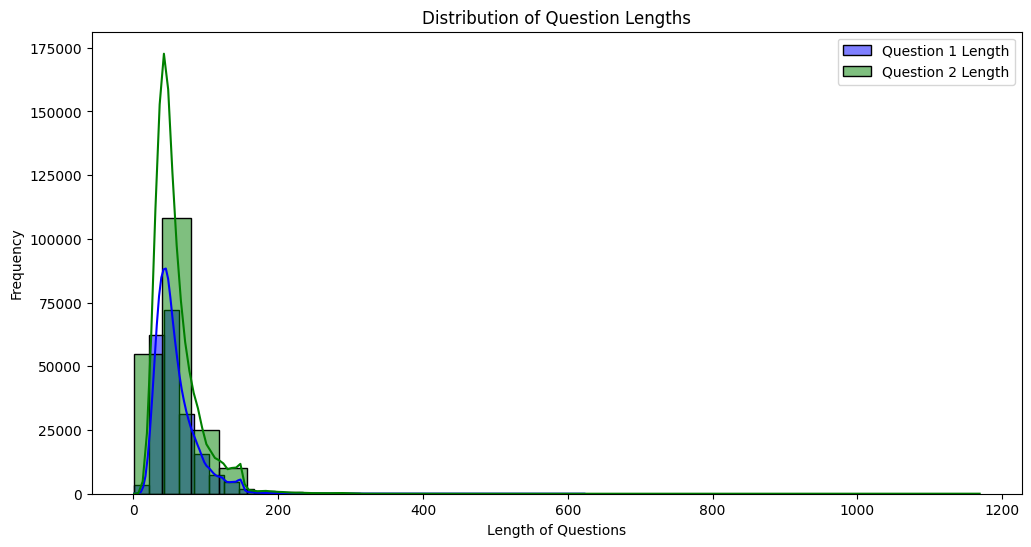

In [ ]:
train_data['q1_length'] = train_data['question1'].apply(len)
train_data['q2_length'] = train_data['question2'].apply(len)

# Plot distributions
plt.figure(figsize=(12, 6))
sns.histplot(train_data['q1_length'], label='Question 1 Length', color='blue', kde=True, bins=30)
sns.histplot(train_data['q2_length'], label='Question 2 Length', color='green', kde=True, bins=30)
plt.title("Distribution of Question Lengths")
plt.xlabel("Length of Questions")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
train_data[train_data["question2"].str.len() > 650].index

Index([  4326,  18055,  51947,  75727,  94476, 118582, 130781, 131653, 153442,
       166715, 190838, 199362],
      dtype='int64')

In [ ]:
train_data = train_data.drop(index = [4326, 18055, 51947, 75727, 94476, 118582, 130781, 131653, 153442, 166715, 190838, 199362])
train_data.shape

(279986, 6)

**Clean Data**

In [ ]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = text.strip()
    return text

train_data['question1'] = train_data['question1'].apply(clean_text)
train_data['question2'] = train_data['question2'].apply(clean_text)

In [ ]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,66,57
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government stole the kohinoor kohinoor diamond back,0,51,88
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,73,59
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 2324 is divided by 2423,0,50,65
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,76,39


## **Convert Data to Vector**

In [ ]:
questions = pd.concat([train_data["question1"], train_data["question2"]])
questions = questions.drop_duplicates().reset_index(drop=True)

In [ ]:
X = train_data[["question1", "question2"]]
y = train_data["is_duplicate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 650)

tfidf.fit(questions)

X_train_q1 = tfidf.transform(X_train['question1'])
X_train_q2 = tfidf.transform(X_train['question2'])
X_test_q1 = tfidf.transform(X_test['question1'])
X_test_q2 = tfidf.transform(X_test['question2'])

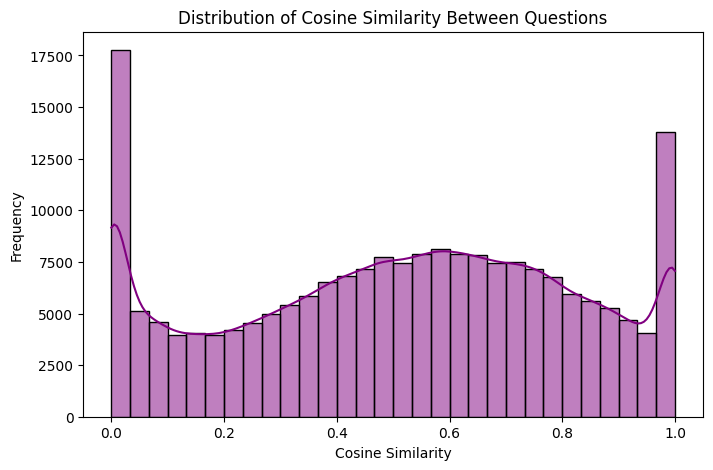

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between questions
tfidf_q1 = tfidf.transform(train_data['question1'])
tfidf_q2 = tfidf.transform(train_data['question2'])

cosine_sim = [cosine_similarity(q1, q2)[0][0] for q1, q2 in zip(tfidf_q1, tfidf_q2)]

# Add cosine similarity to the dataset
train_data['cosine_similarity'] = cosine_sim

# Plot cosine similarity distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_data['cosine_similarity'], bins=30, kde=True, color='purple')
plt.title("Distribution of Cosine Similarity Between Questions")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

## **Build Model Pipeline**

In [ ]:
# Combine the features for both questions
X_train_combined = np.hstack((X_train_q1.toarray(), X_train_q2.toarray()))
X_test_combined = np.hstack((X_test_q1.toarray(), X_test_q2.toarray()))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"Support Vector Machine": SVC(kernel='linear', probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


results = {}
for model_name, model in models.items():
    print(f"Evaluating: {model_name}")

    pipeline = Pipeline([
        ('model', model)
    ])

    if model_name == "Naive Bayes":
        pipeline.fit(X_train_combined, y_train)
        y_pred = pipeline.predict(X_test_combined)
    else:
        pipeline.fit(X_train_combined, y_train)
        y_pred = pipeline.predict(X_test_combined)

    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

print("\nModel Accuracy Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")

Evaluating: Logistic Regression
Evaluating: Random Forest
Evaluating: Naive Bayes
Evaluating: K-Nearest Neighbors

Model Accuracy Comparison:
Logistic Regression: 0.67
Random Forest: 0.77
Naive Bayes: 0.64
K-Nearest Neighbors: 0.72


In [ ]:
import pickle

for model_name, model in models.items():
    file_name = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)
        print(f"{model_name} saved as {file_name}")

Logistic Regression saved as logistic_regression_model.pkl
Random Forest saved as random_forest_model.pkl
Naive Bayes saved as naive_bayes_model.pkl
K-Nearest Neighbors saved as k-nearest_neighbors_model.pkl


## **Build Tensorflow Model using Glove**

Build tf model to check model accuracy improve or not...

In [ ]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-01-11 13:47:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.95MB/s    in 2m 42s  

2025-01-11 13:50:35 (5.09 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
from gensim.models.keyedvectors import KeyedVectors

def load_glove_model(glove_file_path):
    word_vectors = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            word_vectors[word] = vector
    return word_vectors

glove_file_path = "/content/glove.6B.300d.txt"
glove_model = load_glove_model(glove_file_path)

print(glove_model.get('king'))

[ 0.0033901 -0.34614    0.28144    0.48382    0.59469    0.012965
  0.53982    0.48233    0.21463   -1.0249    -0.34788   -0.79001
 -0.15084    0.61374    0.042811   0.19323    0.25462    0.32528
  0.05698    0.063253  -0.49439    0.47337   -0.16761    0.045594
  0.30451   -0.35416   -0.34583   -0.20118    0.25511    0.091111
  0.014651  -0.017541  -0.23854    0.48215   -0.9145    -0.36235
  0.34736    0.028639  -0.027065  -0.036481  -0.067391  -0.23452
 -0.13772    0.33951    0.13415   -0.1342     0.47856   -0.1842
  0.10705   -0.45834   -0.36085   -0.22595    0.32881   -0.13643
  0.23128    0.34269    0.42344    0.47057    0.479      0.074639
  0.3344     0.10714   -0.13289    0.58734    0.38616   -0.52238
 -0.22028   -0.072322   0.32269    0.44226   -0.037382   0.18324
  0.058082   0.26938    0.36202    0.13983    0.016815  -0.34426
  0.4827     0.2108     0.75618   -0.13092   -0.025741   0.43391
  0.33893   -0.16438    0.26817    0.68774    0.311     -0.2509
  0.0027749 -0.39809   

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def get_glove_embeddings(question, glove_model):
    words = word_tokenize(question.lower())
    vectors = []

    for word in words:
        if word in glove_model:
            vectors.append(glove_model[word])


    if len(vectors) == 0:
        return np.zeros(300)

    return np.mean(vectors, axis=0)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
X_train_glove = np.array([get_glove_embeddings(q, glove_model) for q in X_train['question1']])
X_test_glove = np.array([get_glove_embeddings(q, glove_model) for q in X_test['question1']])

X_train_glove_q2 = np.array([get_glove_embeddings(q, glove_model) for q in X_train['question2']])
X_test_glove_q2 = np.array([get_glove_embeddings(q, glove_model) for q in X_test['question2']])

X_train_combined_glove = np.hstack((X_train_glove, X_train_glove_q2))
X_test_combined_glove = np.hstack((X_test_glove, X_test_glove_q2))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def build_model(input_dim):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model


model = build_model(input_dim=X_train_combined_glove.shape[1])
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

history = model.fit(
    X_train_combined_glove,
    y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_test_combined_glove, y_test),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/200
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6214 - loss: 1.1679 - val_accuracy: 0.6788 - val_loss: 0.6814 - learning_rate: 0.0010
Epoch 2/200
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.6784 - loss: 0.6686 - val_accuracy: 0.6286 - val_loss: 0.7191 - learning_rate: 0.0010
Epoch 3/200
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6871 - loss: 0.6589 - val_accuracy: 0.6846 - val_loss: 0.6406 - learning_rate: 0.0010
Epoch 4/200
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6817 - loss: 0.6558 - val_accuracy: 0.6995 - val_loss: 0.6288 - learning_rate: 0.0010
Epoch 5/200
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6851 - loss: 0.6522 - val_accuracy: 0.6885 - val_loss: 0.6319 - learning_rate: 0.0010
Epoch 6/200
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6829 - loss: 0.6518 - val_accuracy: 0.6986 - val_loss: 0.6261 - learning_rate: 0.0010
Epoch 7/200
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accura

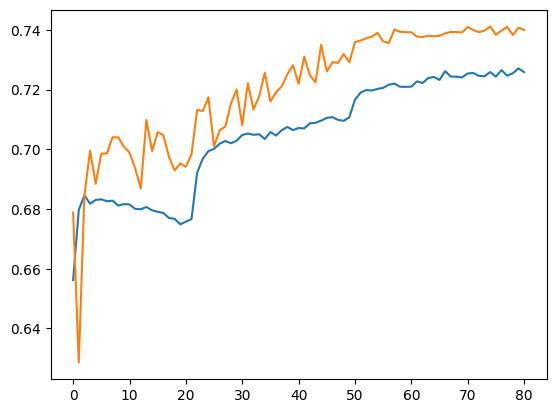

In [ ]:
history = history.history

plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.show()

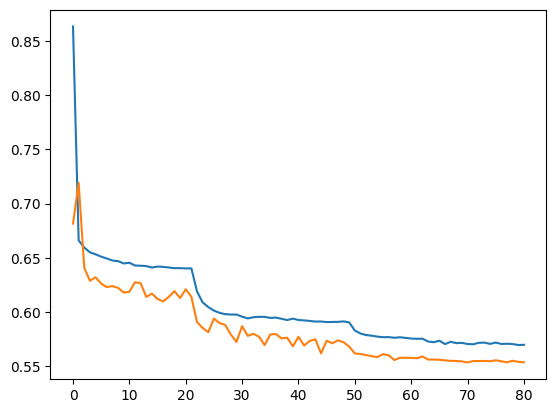

In [ ]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.show()

## **Model Prediction**

Check the model performance in unseen Data

In [ ]:
test_data = [
    ("What is the capital of France?", "Which city is the capital of France?"),
    ("How to cook pasta?", "What is the population of India?"),
    ("How can I improve my coding skills?", "What are the best ways to get better at coding?"),
    ("What is machine learning?", "Explain the laws of thermodynamics."),
    ("What is the best smartphone in 2025?", "Which smartphone should I buy this year?")
]


expected_results = [1, 0, 1, 0, 1]


def preprocess_text(pair, glove_model):
    text1, text2 = pair
    processed_text1 = get_glove_embeddings(text1, glove_model)
    processed_text2 = get_glove_embeddings(text2, glove_model)
    return processed_text1, processed_text2

# Prediction function
def predict_duplicate(model, pair, glove_model):
    processed_text1, processed_text2 = preprocess_text(pair, glove_model)
    combined_input = np.concatenate([processed_text1, processed_text2]).reshape(1, -1)
    prediction = model.predict(combined_input)
    return 1 if prediction >= 0.5 else 0  # Binary classification threshold


for i, pair in enumerate(test_data):
    print(f"Test Pair {i+1}: {pair}")
    prediction = predict_duplicate(model, pair, glove_model)
    print(f"Predicted: {prediction}, Expected: {expected_results[i]}\n")

Test Pair 1: ('What is the capital of France?', 'Which city is the capital of France?')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted: 1, Expected: 1

Test Pair 2: ('How to cook pasta?', 'What is the population of India?')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: 0, Expected: 0

Test Pair 3: ('How can I improve my coding skills?', 'What are the best ways to get better at coding?')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted: 1, Expected: 1

Test Pair 4: ('What is machine learning?', 'Explain the laws of thermodynamics.')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted: 0, Expected: 0

Test Pair 5: ('What is the best smartphone in 2025?', 'Which smartphone should I buy this year?')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted: 1, Expected: 1



In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,2,What but is the best way to send money from China to the US?,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
test_data = test_data.head(10)
test_data.shape

(10, 3)

In [ ]:
results = []

# Predict for each pair in the test data
for i, row in test_data.iterrows():
    pair = (row['question1'], row['question2'])
    test_id = row['test_id']
    is_duplicate = predict_duplicate(model, pair, glove_model)
    results.append([test_id, is_duplicate])


results_df = pd.DataFrame(results, columns=['test_id', 'is_duplicate'])
results_df.to_csv('sample_submission_1.csv', index=False)

print("Results saved to Sample.csv")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Results saved to Sample.csv
